In [ ]:
%pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target  

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Normalize features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Build an Improved Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),  # Increased neurons
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer (for regression)
])

# Step 5: Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Step 6: Implement Early Stopping to prevent overfitting
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Step 7: Train the model
history = model.fit(X_train, y_train, 
                    epochs=200, batch_size=32, 
                    validation_split=0.2, verbose=1, 
                    callbacks=[early_stop])

# Step 8: Evaluate on test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test MAE: {test_mae:.4f}")



Epoch 1/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.9667 - mae: 0.6982 - val_loss: 0.4070 - val_mae: 0.4524
Epoch 2/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3629 - mae: 0.4325 - val_loss: 0.3789 - val_mae: 0.4247
Epoch 3/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3385 - mae: 0.4155 - val_loss: 0.3553 - val_mae: 0.4125
Epoch 4/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3273 - mae: 0.3995 - val_loss: 0.3318 - val_mae: 0.3999
Epoch 5/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3054 - mae: 0.3878 - val_loss: 0.3414 - val_mae: 0.3952
Epoch 6/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3007 - mae: 0.3825 - val_loss: 0.3218 - val_mae: 0.3962
Epoch 7/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2948 - mae: 0.3777 - val_loss: 0.3141 - val_mae: 0.3866
Epoch 8/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2878 - mae: 0.3736 - val_loss: 0.3118 - val_mae: 0.3897
Epoch 9/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/

In [ ]:
print(history.history.keys())

In [9]:
# Step 9: Make predictions
predictions = model.predict(X_test[:5])
print("Sample Predictions:", predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Sample Predictions: [0.60600287 1.0847394  4.7500443  2.5891728  2.5384665 ]


In [ ]:
print(X_test[:5])

In [10]:
print(y_test[:5])

[0.477   0.458   5.00001 2.186   2.78   ]


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target  

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the data (important for NN, helps Linear Regression too)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------- Neural Network Model -------------------
# Step 4: Define the Neural Network Model
nn_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer
])

# Step 5: Compile the model
nn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Step 6: Train with EarlyStopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

nn_model.fit(X_train_scaled, y_train, 
             epochs=200, batch_size=32, 
             validation_split=0.2, verbose=1, 
             callbacks=[early_stop])

# Step 7: Evaluate NN performance
y_pred_nn = nn_model.predict(X_test_scaled)
nn_mae = mean_absolute_error(y_test, y_pred_nn)
nn_r2 = r2_score(y_test, y_pred_nn)

# ------------------- Linear Regression Model -------------------
# Step 8: Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Step 9: Make predictions with Linear Regression
y_pred_lr = lr_model.predict(X_test_scaled)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

# ------------------- Compare Results -------------------
print("\n🔹 Performance Comparison 🔹")
print(f"Neural Network - MAE: {nn_mae:.4f}, R² Score: {nn_r2:.4f}")
print(f"Linear Regression - MAE: {lr_mae:.4f}, R² Score: {lr_r2:.4f}")


Epoch 1/200


/Users/tkmagesh77/Documents/Learning/Nutanix-ML-Beginner-Prep/code/ml_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7380 - mae: 0.9642 - val_loss: 0.5088 - val_mae: 0.4980
Epoch 2/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5663 - mae: 0.5619 - val_loss: 0.4216 - val_mae: 0.4406
Epoch 3/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5145 - mae: 0.5280 - val_loss: 0.4166 - val_mae: 0.4312
Epoch 4/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4458 - mae: 0.4847 - val_loss: 0.4263 - val_mae: 0.4237
Epoch 5/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4277 - mae: 0.4736 - val_loss: 0.4783 - val_mae: 0.4117
Epoch 6/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4073 - mae: 0.4631 - val_loss: 0.4035 - val_mae: 0.4348
Epoch 7/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3968 - mae: 0.4564 - val_loss: 0.3756 - val_mae: 0.4131
Epoch 8/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3810 - mae: 0.4471 - val_loss: 0.3580 - val_mae: 0.4041
Epoch 9/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss:

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target  

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the data (important for NN, helps Linear Regression too)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------- Neural Network Model -------------------
# Step 4: Define the Neural Network Model
nn_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    # keras.layers.BatchNormalization(),
    # keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64, activation='relu'),
    # keras.layers.BatchNormalization(),
    # keras.layers.Dropout(0.2),
    
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer
])

# Step 5: Compile the model
nn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Step 6: Train with EarlyStopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

nn_model.fit(X_train_scaled, y_train, 
             epochs=200, batch_size=32, 
             validation_split=0.2, verbose=1, 
             callbacks=[early_stop])

# Step 7: Evaluate NN performance
y_pred_nn = nn_model.predict(X_test_scaled)
nn_mae = mean_absolute_error(y_test, y_pred_nn)
nn_r2 = r2_score(y_test, y_pred_nn)

# ------------------- Linear Regression Model -------------------
# Step 8: Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Step 9: Make predictions with Linear Regression
y_pred_lr = lr_model.predict(X_test_scaled)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

# ------------------- Compare Performance -------------------
print("\n🔹 Performance Comparison 🔹")
print(f"Neural Network - MAE: {nn_mae:.4f}, R² Score: {nn_r2:.4f}")
print(f"Linear Regression - MAE: {lr_mae:.4f}, R² Score: {lr_r2:.4f}")

# ------------------- Predict 5 Sample Targets -------------------
num_samples = 5
sample_inputs = X_test_scaled[:num_samples]
sample_targets = y_test[:num_samples]

nn_sample_preds = nn_model.predict(sample_inputs).flatten()
lr_sample_preds = lr_model.predict(sample_inputs)

# Print results
print("\n🔹 Sample Predictions (First 5 test cases) 🔹")
print(f"{'Index':<6}{'Actual Target':<15}{'NN Prediction':<15}{'LR Prediction':<15}")
print("=" * 55)
for i in range(num_samples):
    print(f"{i:<6}{sample_targets[i]:<15.4f}{nn_sample_preds[i]:<15.4f}{lr_sample_preds[i]:<15.4f}")


In [ ]:
# Activation Functions
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the input range
x = np.linspace(-5, 5, 100)

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x):
    return x * sigmoid(x)

# Softmax needs multiple values (vector input), so we'll compute it for the full range
softmax_x = np.array([x])
softmax_y = np.exp(softmax_x) / np.sum(np.exp(softmax_x), axis=0)

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Plot each activation function
axes[0, 0].plot(x, sigmoid(x), label='Sigmoid', color='b')
axes[0, 0].set_title("Sigmoid Activation Function")

axes[0, 1].plot(x, tanh(x), label='Tanh', color='g')
axes[0, 1].set_title("Tanh Activation Function")

axes[1, 0].plot(x, relu(x), label='ReLU', color='r')
axes[1, 0].set_title("ReLU Activation Function")

axes[1, 1].plot(x, leaky_relu(x), label='Leaky ReLU', color='purple')
axes[1, 1].set_title("Leaky ReLU Activation Function")

axes[2, 0].plot(x, elu(x), label='ELU', color='orange')
axes[2, 0].set_title("ELU Activation Function")

axes[2, 1].plot(x, swish(x), label='Swish', color='brown')
axes[2, 1].set_title("Swish Activation Function")

# Formatting
for ax in axes.flat:
    ax.legend()
    ax.grid(True)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data (simple linear regression problem)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Random numbers from 0 to 10
y = 3 * X + 7 + np.random.randn(100, 1) * 2  # y = 3x + 7 + noise

# Step 2: Build a simple neural network with 1 layer (1 neuron)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Step 3: Define Mean Squared Error (MSE) Loss and SGD Optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_function = tf.keras.losses.MeanSquaredError()  # Corrected loss function usage

# Store gradient values for visualization
gradients_history = []

# Step 4: Custom Training Loop to Capture Gradients
for epoch in range(50):  # Train for 50 epochs
    with tf.GradientTape() as tape:
        y_pred = model(X, training=True)  # Forward pass
        loss = loss_function(y, y_pred)  # Compute loss (fixed)

    gradients = tape.gradient(loss, model.trainable_variables)  # Compute gradients
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))  # Update weights
    
    gradients_history.append(tf.reduce_mean(gradients[0]).numpy())  # Store average gradient magnitude

# Step 5: Plot Gradient Values Over Time
plt.figure(figsize=(8, 5))
plt.plot(range(len(gradients_history)), gradients_history, label="Gradient Magnitude", color="b")
plt.xlabel("Epoch")
plt.ylabel("Average Gradient")
plt.title("Gradient Magnitude Over Training")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

%matplotlib notebook

# Define the Neural Network structure
layers = [3, 5, 4, 2]  # Example: 3 input neurons, 5 in hidden layer 1, 4 in hidden layer 2, 2 output neurons

# Define positions for neurons in each layer
layer_x = np.linspace(1, len(layers), len(layers))  # X-coordinates for layers
neuron_positions = []  # Store (x, y) positions of neurons

for i, num_neurons in enumerate(layers):
    y_positions = np.linspace(-1, 1, num_neurons) * 2  # Spread neurons in each layer
    neuron_positions.append([(layer_x[i], y) for y in y_positions])

# Activation Functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

activation_functions = [relu, sigmoid, tanh]  # List of activations to apply

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 6))
ax.set_xlim(0, len(layers) + 1)
ax.set_ylim(-2.5, 2.5)
ax.axis('off')

# Plot neurons
neurons = []
for layer in neuron_positions:
    for (x, y) in layer:
        neuron, = ax.plot(x, y, 'o', markersize=12, color='gray', alpha=0.5)
        neurons.append(neuron)

# Plot connections (edges)
connections = []
for i in range(len(layers) - 1):  # Connect each layer to the next
    for (x1, y1) in neuron_positions[i]:  # Neurons in current layer
        for (x2, y2) in neuron_positions[i + 1]:  # Neurons in next layer
            line, = ax.plot([x1, x2], [y1, y2], 'gray', alpha=0.3)
            connections.append(line)

# Animation function
def update(frame):
    layer_index = frame % len(layers)  # Cycle through layers
    activation_index = (frame // len(layers)) % len(activation_functions)  # Cycle through activations
    
    activation_function = activation_functions[activation_index]  # Select activation function
    activation_name = ["ReLU", "Sigmoid", "Tanh"][activation_index]  # Display name
    
    # Reset colors
    for neuron in neurons:
        neuron.set_color('gray')

    # Apply activation to the current layer neurons
    raw_values = np.random.uniform(-2, 2, size=len(neuron_positions[layer_index]))  # Simulated neuron outputs
    activated_values = activation_function(raw_values)  # Apply activation function
    
    # Highlight active neurons based on activation output
    for i, (x, y) in enumerate(neuron_positions[layer_index]):
        neurons_position = neuron_positions[layer_index].index((x, y))
        intensity = activated_values[i] / max(abs(activated_values))  # Normalize intensity
        neurons[layer_index * max(layers) + neurons_position].set_color((0, 0, 1, max(0.1, intensity)))  # Blue with intensity
    
    ax.set_title(f"Layer {layer_index + 1} with {activation_name} Activation", fontsize=14)

    return neurons

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(layers) * len(activation_functions) * 2, interval=800, repeat=True)

# Display animation in Jupyter Notebook
HTML(ani.to_jshtml())


In [ ]:
# Activation Functions (animation)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

%matplotlib notebook

# Define activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# Generate input values (neuron activations)
x = np.linspace(-5, 5, 100)

# Define figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-5, 5)
ax.set_ylim(-1.5, 1.5)
ax.axhline(0, color="black", linewidth=0.5)  # Horizontal line
ax.axvline(0, color="black", linewidth=0.5)  # Vertical line
ax.grid()

# Create empty plot lines for activation functions
relu_line, = ax.plot([], [], label="ReLU", color="blue", linewidth=2)
sigmoid_line, = ax.plot([], [], label="Sigmoid", color="green", linewidth=2)
tanh_line, = ax.plot([], [], label="Tanh", color="red", linewidth=2)

ax.legend()

# Function to initialize the plot
def init():
    relu_line.set_data([], [])
    sigmoid_line.set_data([], [])
    tanh_line.set_data([], [])
    return relu_line, sigmoid_line, tanh_line

# Function to update the animation
def update(frame):
    # Simulate a dynamic neuron activation by shifting the input range
    x_shifted = x + (frame % 10) / 5 - 1  # Shift x over time

    # Compute activation outputs
    relu_output = relu(x_shifted)
    sigmoid_output = sigmoid(x_shifted)
    tanh_output = tanh(x_shifted)

    # Update plot data
    relu_line.set_data(x, relu_output)
    sigmoid_line.set_data(x, sigmoid_output)
    tanh_line.set_data(x, tanh_output)

    return relu_line, sigmoid_line, tanh_line

# Create and store the animation (fixes the error)
ani = animation.FuncAnimation(fig, update, frames=30, init_func=init, interval=200, repeat=True)

# Display animation in Jupyter Notebook
HTML(ani.to_jshtml())



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


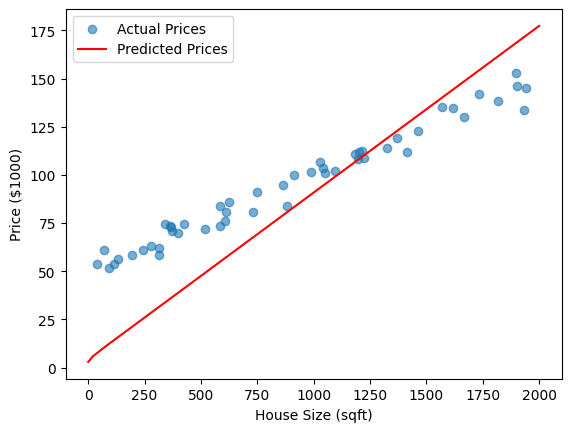

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from IPython.display import HTML

%matplotlib notebook
# Generate synthetic dataset (house size vs price)
np.random.seed(42)
X_train = np.random.rand(50, 1) * 2000  # House sizes between 0-2000 sqft
y_train = 50 + 0.05 * X_train + np.random.randn(50, 1) * 5  # House prices with some noise

# Define a simple Neural Network (1 input, 1 hidden, 1 output layer)
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu'),  # Hidden layer with 5 neurons
    # keras.layers.Dense(5, activation='relu'),  # Hidden layer with 3 neurons
    keras.layers.Dense(1)  # Output layer (predict price)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=1000, verbose=0)

# Make predictions
X_test = np.linspace(0, 2000, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

%matplotlib inline

# Plot predictions
plt.scatter(X_train, y_train, label="Actual Prices", alpha=0.6)
plt.plot(X_test, y_pred, color="red", label="Predicted Prices")
plt.xlabel("House Size (sqft)")
plt.ylabel("Price ($1000)")
plt.legend()
plt.show()



🔹 Training Model: No Hidden Layer (Linear Regression)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9708.5615 - mae: 94.2634 
✅ MAE: 95.0282, Time: 17.60 sec

🔹 Training Model: 1 Hidden Layer (10 neurons)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 766.9830 - mae: 23.0161 
✅ MAE: 22.7834, Time: 16.85 sec

🔹 Training Model: 2 Hidden Layers (10, 5 neurons)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 575.1241 - mae: 19.9248 
✅ MAE: 19.7379, Time: 16.72 sec

🔹 Training Model: 3 Hidden Layers (20, 10, 5 neurons)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 691.6087 - mae: 22.1625  
✅ MAE: 22.0282, Time: 17.55 sec


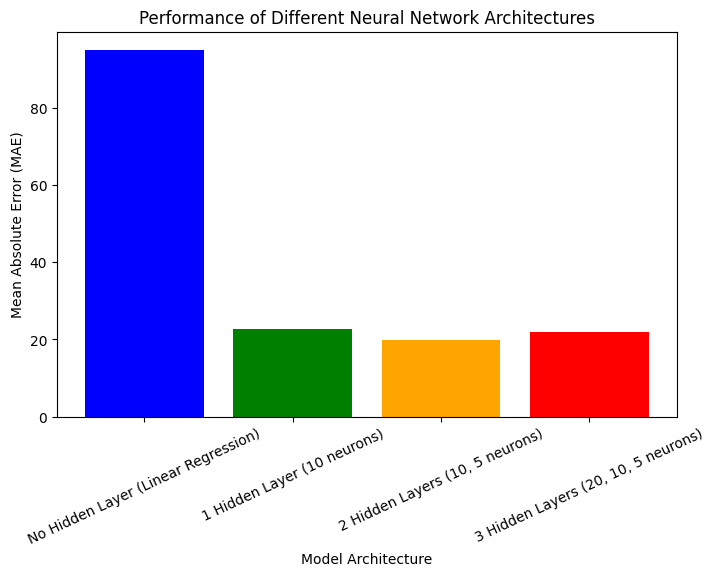

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import time

# Generate synthetic dataset (house size vs price)
np.random.seed(42)
X_train = np.random.rand(100, 1) * 2000  # House sizes between 0-2000 sqft
y_train = 50 + 0.05 * X_train + np.random.randn(100, 1) * 5  # House prices with noise

# Define different architectures to test
architectures = {
    "No Hidden Layer (Linear Regression)": [0],  # Only input and output layers
    "1 Hidden Layer (10 neurons)": [10],  # 1 hidden layer with 10 neurons
    "2 Hidden Layers (10, 5 neurons)": [10, 5],  # 2 hidden layers
    "3 Hidden Layers (20, 10, 5 neurons)": [20, 10, 5]  # 3 hidden layers
}

results = {}

# Loop through architectures and train models
for name, layers in architectures.items():
    print(f"\n🔹 Training Model: {name}")

    # Start measuring time
    start_time = time.time()
    
    # Define the model dynamically based on the architecture
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(1,)))  # Input layer
    
    # Add hidden layers
    for neurons in layers:
        model.add(keras.layers.Dense(neurons, activation='relu'))
    
    # Output layer
    model.add(keras.layers.Dense(1))  # Regression output (predict house price)
    
    # Compile model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # Train model
    history = model.fit(X_train, y_train, epochs=500, verbose=0)
    
    # Evaluate on training data
    loss, mae = model.evaluate(X_train, y_train, verbose=1)
    
    # Record time taken
    training_time = time.time() - start_time
    
    # Store results
    results[name] = {"MAE": mae, "Training Time": training_time}
    print(f"✅ MAE: {mae:.4f}, Time: {training_time:.2f} sec")

# Plot MAE comparison
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [res["MAE"] for res in results.values()], color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Model Architecture")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Performance of Different Neural Network Architectures")
plt.xticks(rotation=25)
plt.show()


In [12]:
import numpy as np

# Initialize network parameters (weights & biases)
W1, B1 = 0.5, 0.1   # Hidden Neuron 1
W2, B2 = -0.3, 0.2  # Hidden Neuron 2
W3, W4, B3 = 0.7, -0.6, 0.05  # Output Neuron

# Hyperparameters
alpha = 0.01  # Learning rate
epochs = 100  # Number of training iterations

# Training data (single example)
X = 2  # Input
Y_true = 1.5  # Expected output

# Activation function (ReLU)
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU
def relu_derivative(x):
    return 1 if x > 0 else 0

# Training loop
for epoch in range(epochs):
    # ** FORWARD PROPAGATION **
    Z1 = (W1 * X) + B1
    A1 = relu(Z1)  # Activation for Hidden Neuron 1
    
    Z2 = (W2 * X) + B2
    A2 = relu(Z2)  # Activation for Hidden Neuron 2
    
    Z_out = (W3 * A1) + (W4 * A2) + B3  # Output neuron (no activation)
    Y_pred = Z_out  # Final output
    
    # Compute loss (Mean Squared Error)
    loss = 0.5 * (Y_true - Y_pred) ** 2

    # ** BACKPROPAGATION **
    dL_dY_pred = Y_pred - Y_true  # Gradient of loss w.r.t output

    # Gradients for Output Layer
    dL_dW3 = dL_dY_pred * A1
    dL_dW4 = dL_dY_pred * A2
    dL_dB3 = dL_dY_pred

    # Gradients for Hidden Layer
    dL_dA1 = dL_dY_pred * W3
    dL_dA2 = dL_dY_pred * W4

    # Apply ReLU derivative
    dL_dZ1 = dL_dA1 * relu_derivative(Z1)
    dL_dZ2 = dL_dA2 * relu_derivative(Z2)

    # Gradients for Hidden Layer Weights & Biases
    dL_dW1 = dL_dZ1 * X
    dL_dB1 = dL_dZ1

    dL_dW2 = dL_dZ2 * X
    dL_dB2 = dL_dZ2

    # ** WEIGHT UPDATES (Gradient Descent) **
    W1 -= alpha * dL_dW1
    W2 -= alpha * dL_dW2
    B1 -= alpha * dL_dB1
    B2 -= alpha * dL_dB2
    W3 -= alpha * dL_dW3
    W4 -= alpha * dL_dW4
    B3 -= alpha * dL_dB3

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Final results
print("\nFinal Weights & Biases:")
print(f"W1: {W1:.4f}, B1: {B1:.4f}")
print(f"W2: {W2:.4f}, B2: {B2:.4f}")
print(f"W3: {W3:.4f}, W4: {W4:.4f}, B3: {B3:.4f}")


Epoch 0: Loss = 0.2312
Epoch 10: Loss = 0.0806
Epoch 20: Loss = 0.0236
Epoch 30: Loss = 0.0062
Epoch 40: Loss = 0.0015
Epoch 50: Loss = 0.0004
Epoch 60: Loss = 0.0001
Epoch 70: Loss = 0.0000
Epoch 80: Loss = 0.0000
Epoch 90: Loss = 0.0000

Final Weights & Biases:
W1: 0.6824, B1: 0.1912
W2: -0.3000, B2: 0.2000
W3: 0.8554, W4: -0.6000, B3: 0.1683
